In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
meat_production_df = pd.read_csv("Data/Meat_Stats_Meat_Production.csv", index_col=0)
meat_cold_storage_df = pd.read_csv('Data/Meat_Stats_Cold_Storage.csv')
meat_slaughter_counts_df = pd.read_csv('Data/Meat_Stats_Slaughter_Counts.csv')
meat_slaughter_weights_df = pd.read_csv('Data/Meat_Stats_Slaughter_Weights.csv')
stock_df = pd.read_csv("Data/all_stock_and_etfs.csv", index_col=0)

In [3]:
meat_production_df.head(5)

,Year,Month,Unit,Production,Animal,Commercial or Federally Inspected,Type of Meat
Date,,,,,,,
Dec-2023,2023,12,Million Pounds,"2,189.80",Beef,Commercial,Red Meat
Nov-2023,2023,11,Million Pounds,"2,280.90",Beef,Commercial,Red Meat
Oct-2023,2023,10,Million Pounds,"2,340.90",Beef,Commercial,Red Meat
Sep-2023,2023,9,Million Pounds,"2,149.40",Beef,Commercial,Red Meat
Aug-2023,2023,8,Million Pounds,"2,363.50",Beef,Commercial,Red Meat


In [4]:
meat_cold_storage_df.head()

,Date,Year,Month,Unit,Animal,Weight,Type_Of_Meat
0,Dec-2023,2023,12,Million Pounds,Beef,457.41,Red Meat
1,Nov-2023,2023,11,Million Pounds,Beef,445.67,Red Meat
2,Oct-2023,2023,10,Million Pounds,Beef,420.85,Red Meat
3,Sep-2023,2023,9,Million Pounds,Beef,395.40,Red Meat
4,Aug-2023,2023,8,Million Pounds,Beef,410.46,Red Meat


In [5]:
meat_slaughter_counts_df.head()

,Date,Year,Month,Unit,Animal,Count,Commercial_Or_Federally_Inspected,Type_Of_Meat
0,Dec-2023,2023,12,"1,000 Head",Cattle,"2,593.40",Commercial,Red Meat
1,Nov-2023,2023,11,"1,000 Head",Cattle,"2,729.90",Commercial,Red Meat
2,Oct-2023,2023,10,"1,000 Head",Cattle,"2,826.00",Commercial,Red Meat
3,Sep-2023,2023,9,"1,000 Head",Cattle,"2,610.60",Commercial,Red Meat
4,Aug-2023,2023,8,"1,000 Head",Cattle,"2,890.00",Commercial,Red Meat


In [6]:
meat_slaughter_weights_df.head()

,Date,Year,Month,Unit,Animal,Weight,Commercial_Or_Federally_Inspected,Live_Or_Dressed,Type_Of_Meat
0,Dec-2023,2023,12,Average Weight in Pounds,Cattle,"1,401.00",Commercial,Live,Red Meat
1,Nov-2023,2023,11,Average Weight in Pounds,Cattle,"1,387.00",Commercial,Live,Red Meat
2,Oct-2023,2023,10,Average Weight in Pounds,Cattle,"1,374.00",Commercial,Live,Red Meat
3,Sep-2023,2023,9,Average Weight in Pounds,Cattle,"1,362.00",Commercial,Live,Red Meat
4,Aug-2023,2023,8,Average Weight in Pounds,Cattle,"1,350.00",Commercial,Live,Red Meat


In [7]:
meat_slaughter_weights_df['Type_Of_Meat'].unique()

array(['Red Meat', 'Poultry'], dtype=object)

In [8]:
meat_production_df["Unit"].unique()

array(['Million Pounds'], dtype=object)

In [9]:
meat_production_df["Animal"].unique()

array(['Beef', 'Veal', 'Pork', 'Lamb and Mutton', 'Broilers',
       'Other Chicken', 'Turkey'], dtype=object)

In [10]:
meat_production_df["Commercial or Federally Inspected"].unique()

array(['Commercial', 'Federally Inspected'], dtype=object)

# Meat Production Graphs

In [11]:
animal_list = meat_production_df["Animal"].unique().tolist()
try:
    meat_production_df['Production'] = meat_production_df['Production'].str.replace(',', '').astype(float)
except:
    pass

In [12]:
grouped_meat_df = meat_production_df.groupby(['Animal','Date']).sum()

In [13]:
grouped_meat_df.head(100)

Year  Month                          Unit  Production  \
Animal Date                                                              
Beef   Apr-1921  3842      8  Million PoundsMillion Pounds       316.0   
       Apr-1922  3844      8  Million PoundsMillion Pounds       332.0   
       Apr-1923  3846      8  Million PoundsMillion Pounds       372.0   
       Apr-1924  3848      8  Million PoundsMillion Pounds       357.0   
       Apr-1925  3850      8  Million PoundsMillion Pounds       389.0   
...               ...    ...                           ...         ...   
       Apr-2016  4032      8  Million PoundsMillion Pounds      3903.8   
       Apr-2017  4034      8  Million PoundsMillion Pounds      3900.0   
       Apr-2018  4036      8  Million PoundsMillion Pounds      4207.1   
       Apr-2019  4038      8  Million PoundsMillion Pounds      4495.7   
       Apr-2020  4040      8  Million PoundsMillion Pounds      3599.3   

                Commercial or Federally Inspected      Type of Meat  
Animal Date                                                          
Beef   Apr-1921     CommercialFederally Inspected  Red MeatRed Meat  
       Apr-1922     CommercialFederally Inspected  Red MeatRed Meat  
       Apr-1923     CommercialFederally Inspected  Red MeatRed Meat  
       Apr-1924     CommercialFederally Inspected  Red MeatRed Meat  
       Apr-1925     CommercialFederally Inspected  Red MeatRed Meat  
...                                           ...               ...  
       Apr-2016     CommercialFederally Inspected  Red MeatRed Meat  
       Apr-2017     CommercialFederally Inspected  Red MeatRed Meat  
       Apr-2018     CommercialFederally Inspected  Red MeatRed Meat  
       Apr-2019     CommercialFederally Inspected  Red MeatRed Meat  
       Apr-2020     CommercialFederally Inspected  Red MeatRed Meat  

[100 rows x 6 columns]

In [14]:
animal_names = grouped_meat_df.index.get_level_values('Animal').unique()
print(animal_names)

Index(['Beef', 'Broilers', 'Lamb and Mutton', 'Other Chicken', 'Pork',
       'Turkey', 'Veal'],
      dtype='object', name='Animal')


C:\Users\anson\AppData\Local\Temp\ipykernel_28696\3555494765.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plot_df.index = pd.to_datetime(plot_df.index.get_level_values('Date'))
C:\Users\anson\AppData\Local\Temp\ipykernel_28696\3555494765.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plot_df.index = pd.to_datetime(plot_df.index.get_level_values('Date'))
C:\Users\anson\AppData\Local\Temp\ipykernel_28696\3555494765.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plot_df.index = pd.to_datetime(plot_df.index.get_level_values('Date'))
C:\Users\anson\AppData\Local

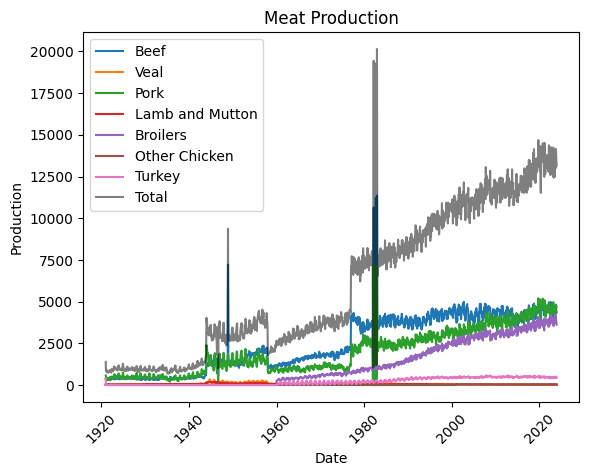

In [15]:
for animal in animal_list:
    plot_df = grouped_meat_df[grouped_meat_df.index.get_level_values('Animal') == animal]
    plot_df.index = pd.to_datetime(plot_df.index.get_level_values('Date'))
    plot_df = plot_df.sort_index()
    plt.plot(plot_df.index, plot_df['Production'], label=animal)

total_production_df = meat_production_df.groupby(['Date']).sum()
total_production_df.index = pd.to_datetime(total_production_df.index.get_level_values('Date'))
total_production_df = total_production_df.sort_index()
plt.plot(total_production_df.index, total_production_df['Production'], label="Total", color="Black", alpha=0.5)

plt.legend()
plt.xlabel('Date')
plt.ylabel('Production')
plt.title('Meat Production')
plt.xticks(rotation=45)
plt.show()

In [18]:
meat_production_data = total_production_df[['Production']]
meat_production_data.index = pd.to_datetime(total_production_df.index)
display(meat_production_data)
meat_production_data.to_csv("Intermediate_data/Total_meat_production.csv")

,Production
Date,
1921-01-01,1387.0
1921-02-01,826.0
1921-03-01,788.0
1921-04-01,760.0
1921-05-01,783.0
...,...
2023-08-01,13939.4
2023-09-01,12994.7
2023-10-01,14154.8


# Stock Graphs

In [16]:
display(stock_df)

,Open,High,Low,Close,Volume,Ticker_Symbol
Date-Time,,,,,,
2024-02-20,29.09,29.7100,29.0001,29.44,2673889,HRL
2024-02-16,29.01,29.1700,28.7650,28.99,5655091,HRL
2024-02-15,28.94,29.2210,28.8500,29.11,2380372,HRL
2024-02-14,28.76,28.8254,28.5100,28.80,2690379,HRL
2024-02-13,29.56,29.8000,28.6350,28.72,4173650,HRL
...,...,...,...,...,...,...
1999-11-05,9.25,9.5000,9.2500,9.50,2300,ALG
1999-11-04,9.31,9.4400,9.3100,9.31,1100,ALG
1999-11-03,9.00,9.2500,9.0000,9.19,35000,ALG


In [17]:
stock_df["Ticker_Symbol"].unique()

array(['HRL', 'VOO', 'ADM', 'AGCO', 'DIA', 'PEP', 'QSR', 'TSCO', 'ONEQ',
       'PPC', 'CAG', 'DRI', 'HSY', 'CAT', 'SBUX', 'CMG', 'COKE', 'CNHI',
       'SPY', 'DE', 'TSN', 'GIS', 'WEN', 'YUM', 'VMI', 'MCD', 'SAP',
       'DPZ', 'ALG'], dtype=object)

In [18]:
stock_des = pd.read_csv("Data/stock_descriptions.csv", index_col=0)

In [19]:
display(stock_des)

,AssetType,Name,Description,Sector,Industry
Symbol,,,,,
QSR,Common Stock,Restaurant Brands International Inc,"Restaurant Brands International Inc. owns, ope...",TRADE & SERVICES,RETAIL-EATING PLACES
ALG,Common Stock,Alamo Group Inc,"Alamo Group Inc. designs, manufactures, distri...",TECHNOLOGY,FARM MACHINERY & EQUIPMENT
SBUX,Common Stock,Starbucks Corporation,Starbucks Corporation is an American multinati...,TRADE & SERVICES,RETAIL-EATING & DRINKING PLACES
CAG,Common Stock,ConAgra Foods Inc,"Conagra Brands, Inc. (formerly ConAgra Foods) ...",MANUFACTURING,FOOD AND KINDRED PRODUCTS
HRL,Common Stock,Hormel Foods Corporation,Hormel Foods Corporation is an American compan...,MANUFACTURING,MEAT PACKING PLANTS
DPZ,Common Stock,Domino’s Pizza Inc,"Domino's Pizza, Inc., branded as Domino's, is ...",TRADE & SERVICES,WHOLESALE-GROCERIES & RELATED PRODUCTS
CMG,Common Stock,Chipotle Mexican Grill Inc,"Chipotle Mexican Grill, Inc., often known simp...",TRADE & SERVICES,RETAIL-EATING PLACES
DRI,Common Stock,Darden Restaurants Inc,"Darden Restaurants, Inc. is an American multi-...",TRADE & SERVICES,RETAIL-EATING PLACES
GIS,Common Stock,General Mills Inc,"General Mills, Inc., is an American multinatio...",MANUFACTURING,GRAIN MILL PRODUCTS


In [20]:
stock_list = stock_df["Ticker_Symbol"].unique().tolist

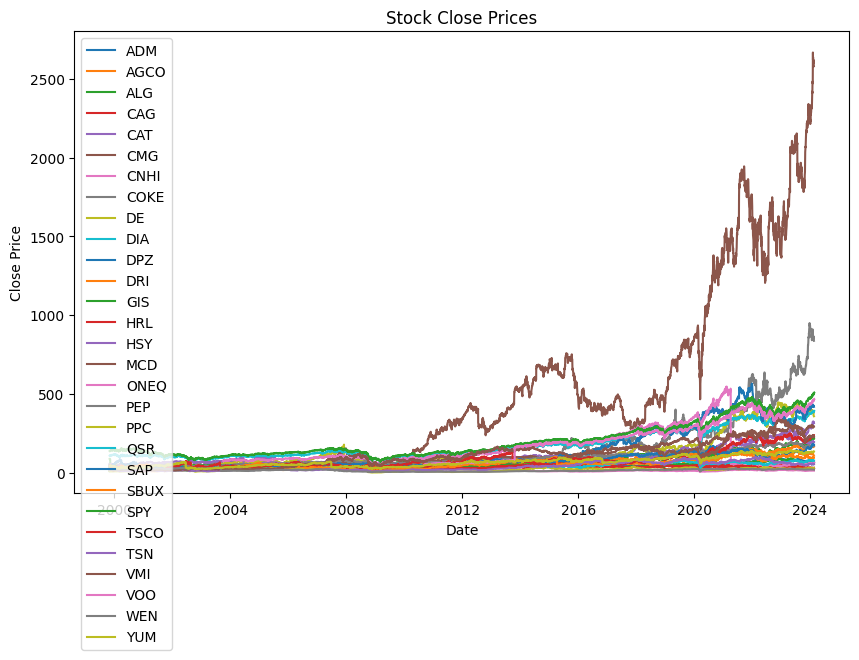

In [27]:
grouped = stock_df.groupby('Ticker_Symbol')

fig = plt.figure(figsize=(10, 6))

for symbol, group in grouped:
    group.index = pd.to_datetime(group.index)
    plt.plot(group.index, group['Close'], label=symbol)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Prices')
plt.legend()
plt.show()